In [1]:
import pandas as pd
import os
import numpy as np


## Reading datasets

In [2]:
val_data = pd.read_csv("../datax/big-vul/train.csv")

In [3]:
val_data.head()

,index,Access Gained,Attack Origin,Authentication Required,Availability,CVE ID,CVE Page,CWE ID,Complexity,Confidentiality,...,parentID,patch,project,project_after,project_before,target,vul_func_with_fix,processed_func,flaw_line,flaw_line_index
0,12473,NaN,Remote,Not required,NaN,CVE-2014-3508,https://www.cvedetails.com/cve/CVE-2014-3508/,CWE-200,Medium,Partial,...,17160033765480453be0a41335fa6b833691c049,"@@ -471,11 +471,12 @@ int OBJ_obj2txt(char *bu...",openssl,https://git.openssl.org/gitweb/?p=openssl.git;...,https://git.openssl.org/gitweb/?p=openssl.git;...,0,const char *OBJ_nid2sn(int n)\n\t{\n\tADDED_OB...,const char *OBJ_nid2sn(int n)\n\t{\n\tADDED_OB...,NaN,NaN
1,24444,NaN,Local,Not required,NaN,CVE-2011-4080,https://www.cvedetails.com/cve/CVE-2011-4080/,CWE-264,High,Complete,...,NaN,"@@ -170,6 +170,11 @@ static int proc_taint(str...",linux,bfdc0b497faa82a0ba2f9dddcf109231dd519fcc,cb16e95fa2996743a6e80a665ed2ed0590bd38cf,0,void register_sysctl_root(struct ctl_table_roo...,void register_sysctl_root(struct ctl_table_roo...,NaN,NaN
2,111436,NaN,Remote,Not required,Partial,CVE-2012-2875,https://www.cvedetails.com/cve/CVE-2012-2875/,NaN,Medium,Partial,...,NaN,"@@ -4058,11 +4058,6 @@ bool WebPage::touchEven...",Chrome,d345af9ed62ee5f431be327967f41c3cc3fe936a,e261bb8e47a6a9fdd1d26fd52b1538c5c9bcb122,0,WebPagePrivate::~WebPagePrivate()\n{\n // H...,WebPagePrivate::~WebPagePrivate()\n{\n m_we...,NaN,NaN
3,1314,NaN,Remote,Not required,Complete,CVE-2009-3604,https://www.cvedetails.com/cve/CVE-2009-3604/,CWE-399,Medium,Complete,...,75c3466ba2e4980802e80b939495981240261cd5,"@@ -216,6 +216,28 @@ void *gmallocn_checkoverf...",poppler,https://cgit.freedesktop.org/poppler/poppler/t...,https://cgit.freedesktop.org/poppler/poppler/t...,0,"char *gstrndup(const char *s, size_t n) {\n c...","char *gstrndup(const char *s, size_t n) {\n c...",NaN,NaN
4,88406,NaN,Remote,Not required,NaN,CVE-2019-15164,https://www.cvedetails.com/cve/CVE-2019-15164/,CWE-918,Low,NaN,...,NaN,"@@ -156,6 +156,8 @@ static int rpcapd_recv(SOC...",libpcap,33834cb2a4d035b52aa2a26742f832a112e90a0a,484d60cbf7ca4ec758c3cbb8a82d68b244a78d58,0,"daemon_AuthUserPwd(char *username, char *passw...","daemon_AuthUserPwd(char *username, char *passw...",NaN,NaN


In [4]:
val_data['vul_func_with_fix'][1]

'void register_sysctl_root(struct ctl_table_root *root)\n{\n\tspin_lock(&sysctl_lock);\n\tlist_add_tail(&root->root_list, &sysctl_table_root.root_list);\n\tspin_unlock(&sysctl_lock);\n}\n'

In [5]:
val_data['processed_func'][1]

'void register_sysctl_root(struct ctl_table_root *root)\n{\n\tspin_lock(&sysctl_lock);\n\tlist_add_tail(&root->root_list, &sysctl_table_root.root_list);\n\tspin_unlock(&sysctl_lock);\n}\n'

In [6]:
val_data['patch'][1]

"@@ -170,6 +170,11 @@ static int proc_taint(struct ctl_table *table, int write,\n \t\t\t       void __user *buffer, size_t *lenp, loff_t *ppos);\n #endif\n \n+#ifdef CONFIG_PRINTK\n+static int proc_dmesg_restrict(struct ctl_table *table, int write,\n+\t\t\t\tvoid __user *buffer, size_t *lenp, loff_t *ppos);\n+#endif\n+\n #ifdef CONFIG_MAGIC_SYSRQ\n /* Note: sysrq code uses it's own private copy */\n static int __sysrq_enabled = SYSRQ_DEFAULT_ENABLE;\n@@ -707,7 +712,7 @@ static struct ctl_table kern_table[] = {\n \t\t.data\t\t= &kptr_restrict,\n \t\t.maxlen\t\t= sizeof(int),\n \t\t.mode\t\t= 0644,\n-\t\t.proc_handler\t= proc_dointvec_minmax,\n+\t\t.proc_handler\t= proc_dmesg_restrict,\n \t\t.extra1\t\t= &zero,\n \t\t.extra2\t\t= &two,\n \t},\n@@ -2394,6 +2399,17 @@ static int proc_taint(struct ctl_table *table, int write,\n \treturn err;\n }\n \n+#ifdef CONFIG_PRINTK\n+static int proc_dmesg_restrict(struct ctl_table *table, int write,\n+\t\t\t\tvoid __user *buffer, size_t *lenp, loff_t 

In [7]:
val_data.describe()

,index,Known Exploits,Score,add_lines,del_lines,target
count,150908.000000,0.0,139607.000000,150908.000000,150908.000000,150908.000000
mean,94292.513074,NaN,5.885495,0.343010,0.239278,0.057890
std,54443.625148,NaN,1.928179,3.850481,3.241024,0.233535
min,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
25%,47127.750000,NaN,4.400000,0.000000,0.000000,0.000000
50%,94325.500000,NaN,6.400000,0.000000,0.000000,0.000000
75%,141431.250000,NaN,7.500000,0.000000,0.000000,0.000000
max,188635.000000,NaN,10.000000,569.000000,459.000000,1.000000


In [8]:
import re
import nltk
from collections import Counter
import scipy.sparse as sp
from numpy.linalg import norm

In [9]:
class TFIDF(object):

    def __init__(self, corpus):        
        self.corpus = corpus
        self.norm_corpus  = None        

    def remove_stopwords(self, text, is_lower_case=False):
        #pattern = r'[^a-zA-z0-9\s]'
        stopword_list = nltk.corpus.stopwords.words('english')

        pattern = r'\n|\t|[^a-zA-z0-9\s]'
        text = re.sub(pattern," ",''.join(text))
        tokens = nltk.word_tokenize(text)
        tokens = [tok.strip() for tok in tokens]
        if is_lower_case:
            cleaned_token = [tok for tok in tokens if tok not in stopword_list]
        else:
            cleaned_tokens = [tok for tok in tokens if tok.lower() not in stopword_list]
        filtered_text = ' '.join(cleaned_tokens)
        return filtered_text
    def __normalize_corpus(self, d):
        stop_words = nltk.corpus.stopwords.words('english')
        d = re.sub(r'[^a-zA-Z0-9\s]', '', d, re.I|re.A)
        d = d.lower().strip()
        tks = nltk.word_tokenize(d)
        f_tks = [t for t in tks if t not in stop_words]
        return ' '.join(f_tks)

    def preprocessing_text(self):
        n_c = np.vectorize(self.remove_stopwords)
        self.norm_corpus = n_c(self.corpus)

    def tf(self):
        words_array = [doc.split() for doc in self.norm_corpus]
        words = list(set([word for words in words_array for word in words]))
        features_dict = {w:0 for w in words}
        tf = []
        for doc in self.norm_corpus:
            bowf_doc = Counter(doc.split())
            all_f = Counter(features_dict)
            bowf_doc.update(all_f)
            tf.append(bowf_doc)
        return pd.DataFrame(tf)

    def df(self, tf):
        features_names = list(tf.columns)
        df = np.diff(sp.csc_matrix(tf, copy=True).indptr)
        df = 1 + df
        return df
        
    def idf(self, df):
        N = 1 + len(self.norm_corpus)
        idf = (1.0 + np.log(float(N) / df)) 
        idf_d = sp.spdiags(idf, diags= 0, m=len(df), n= len(df)).todense()      
        return idf, idf_d

    def tfidf(self, tf, idf):        
        tf = np.array(tf, dtype='float64')
        tfidf = tf * idf
        norms = norm(tfidf , axis=1)
        return (tfidf / norms[:,None])

In [10]:
val_data.columns.values.tolist()

['index',
 'Access Gained',
 'Attack Origin',
 'Authentication Required',
 'Availability',
 'CVE ID',
 'CVE Page',
 'CWE ID',
 'Complexity',
 'Confidentiality',
 'Integrity',
 'Known Exploits',
 'Publish Date',
 'Score',
 'Summary',
 'Update Date',
 'Vulnerability Classification',
 'add_lines',
 'codeLink',
 'commit_id',
 'commit_message',
 'del_lines',
 'file_name',
 'files_changed',
 'func_after',
 'func_before',
 'lang',
 'lines_after',
 'lines_before',
 'parentID',
 'patch',
 'project',
 'project_after',
 'project_before',
 'target',
 'vul_func_with_fix',
 'processed_func',
 'flaw_line',
 'flaw_line_index']

In [11]:
#pd.Series({c: val_data[c].unique() for c in val_data})
val_data["lang"].unique()

array(['C', 'CPP', 'C++'], dtype=object)

In [12]:
val_data["Complexity"].unique()

array(['Medium', 'High', 'Low', nan, '???'], dtype=object)

In [13]:
val_data["del_lines"].describe()

count    150908.000000
mean          0.239278
std           3.241024
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         459.000000
Name: del_lines, dtype: float64

In [14]:
val_data['vul_func_with_fix'][1]

'void register_sysctl_root(struct ctl_table_root *root)\n{\n\tspin_lock(&sysctl_lock);\n\tlist_add_tail(&root->root_list, &sysctl_table_root.root_list);\n\tspin_unlock(&sysctl_lock);\n}\n'

In [15]:
val_data['func_after'][1]

'void register_sysctl_root(struct ctl_table_root *root)\n{\n\tspin_lock(&sysctl_lock);\n\tlist_add_tail(&root->root_list, &sysctl_table_root.root_list);\n\tspin_unlock(&sysctl_lock);\n}\n'

In [16]:
val_data.shape

(150908, 39)

In [17]:
result_df = val_data[val_data['vul_func_with_fix'] != val_data['func_before']]

In [18]:
result_df.shape

(27134, 39)

In [19]:
test= result_df["Summary"].tolist()
test[9]

'Inappropriate implementation in Blink in Google Chrome prior to 74.0.3729.108 allowed a remote attacker to bypass same origin policy via a crafted HTML page.'

In [20]:
test= val_data["Summary"].dropna().tolist()
#test = test[8:10]
test

["The OBJ_obj2txt function in crypto/objects/obj_dat.c in OpenSSL 0.9.8 before 0.9.8zb, 1.0.0 before 1.0.0n, and 1.0.1 before 1.0.1i, when pretty printing is used, does not ensure the presence of '\\0' characters, which allows context-dependent attackers to obtain sensitive information from process stack memory by reading output from X509_name_oneline, X509_name_print_ex, and unspecified other functions.",
 'The sysrq_sysctl_handler function in kernel/sysctl.c in the Linux kernel before 2.6.39 does not require the CAP_SYS_ADMIN capability to modify the dmesg_restrict value, which allows local users to bypass intended access restrictions and read the kernel ring buffer by leveraging root privileges, as demonstrated by a root user in a Linux Containers (aka LXC) environment.',
 'Multiple unspecified vulnerabilities in the PDF functionality in Google Chrome before 22.0.1229.79 allow remote attackers to have an unknown impact via a crafted document.',
 'The Splash::drawImage function in Sp

In [21]:
data= result_df["func_before"].dropna().tolist()

In [22]:
data[1]

'daemon_AuthUserPwd(char *username, char *password, char *errbuf)\n{\n#ifdef _WIN32\n\t/*\n\t * Warning: the user which launches the process must have the\n\t * SE_TCB_NAME right.\n\t * This corresponds to have the "Act as part of the Operating System"\n\t * turned on (administrative tools, local security settings, local\n\t * policies, user right assignment)\n\t * However, it seems to me that if you run it as a service, this\n\t * right should be provided by default.\n\t *\n\t * XXX - hopefully, this returns errors such as ERROR_LOGON_FAILURE,\n\t * which merely indicates that the user name or password is\n\t * incorrect, not whether it\'s the user name or the password\n\t * that\'s incorrect, so a client that\'s trying to brute-force\n\t * accounts doesn\'t know whether it\'s the user name or the\n\t * password that\'s incorrect, so it doesn\'t know whether to\n\t * stop trying to log in with a given user name and move on\n\t * to another user name.\n\t */\n\tDWORD error;\n\tHANDLE T

In [23]:
a = TFIDF(data[:100])

In [24]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
a.preprocessing_text()

In [26]:
tf = a.tf()
tf

,WebPagePrivate,m_webPage,setVisible,false,BackingStorePrivate,currentBackingStoreOwner,setCurrentBackingStoreOwner,0,delete,m_webSettings,...,InitByIdLookup,UMA_HISTOGRAM_ENUMERATION,sync,fusion_algorithm,SetCryptographerReady,RecordAction,suided,FinishFlush,first_party_for_cookies,ext4_find_delalloc_range
0,2,2,1,1,2,1,1,13,11,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,2
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df = a.df(tf)
df

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [28]:
idf, idf_d = a.idf(df)


In [29]:
tfidf = a.tfidf(tf, idf)


In [30]:
df = pd.DataFrame(np.round(tfidf,2), columns= list(tf.columns))
sorted_column_df = df.sort_index(axis=1)
sorted_column_df

,0,0000,0003,02x,03,04x,0600,0640,0\n,0x,...,zend_error_handling,zend_exception_get_default,zend_object_store_get_object,zend_parse_parameters,zend_replace_error_handling,zend_restore_error_handling,zend_throw_exception,zeroed,zeroout,zval
0,0.36,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
1,0.07,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
2,0.03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
3,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
4,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.08,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
96,0.07,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.01,0.0
97,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
98,0.02,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0


In [31]:
sorted_column_df = sorted_column_df.stack().reset_index()

In [32]:
sorted_column_df

,level_0,level_1,0
0,0,0,0.36
1,0,0000,0.00
2,0,0003,0.00
3,0,02x,0.00
4,0,03,0.00
...,...,...,...
364495,99,zend_restore_error_handling,0.00
364496,99,zend_throw_exception,0.00
364497,99,zeroed,0.00
364498,99,zeroout,0.00


In [33]:
tfidf_df = sorted_column_df.rename(columns={0:'tfidf', 'level_0': 'snippet','level_1': 'term', 'level_2': 'count'})
tfidf_df.sort_values(by=['snippet','tfidf'], ascending=[True,False]).groupby(['snippet']).head(10)


,snippet,term,tfidf
1765,0,delete,0.69
0,0,0,0.36
150,0,BackingStorePrivate,0.15
895,0,PUBLIC_BUILD,0.15
1305,0,WebPagePrivate,0.15
...,...,...,...
364201,99,suggested_text,0.21
362372,99,break,0.15
360927,99,ACTION_NONE,0.14
360989,99,AutocompleteMatch,0.14


## Testing TF-IDF for natural laguage

In [34]:
tfidf_df

,snippet,term,tfidf
0,0,0,0.36
1,0,0000,0.00
2,0,0003,0.00
3,0,02x,0.00
4,0,03,0.00
...,...,...,...
364495,99,zend_restore_error_handling,0.00
364496,99,zend_throw_exception,0.00
364497,99,zeroed,0.00
364498,99,zeroout,0.00


In [38]:
tfidf_df = tfidf_df[tfidf_df.term.str.contains('^[^0-9()]+$', regex=True, na=False)]

In [39]:
import altair as alt


In [40]:
tfidf_df.sort_values(by=['snippet','tfidf'], ascending=[True,False]).groupby(['snippet']).head(10)


,snippet,term,tfidf
1765,0,delete,0.69
150,0,BackingStorePrivate,0.15
895,0,PUBLIC_BUILD,0.15
1305,0,WebPagePrivate,0.15
2568,0,m_backingStoreClient,0.15
...,...,...,...
362372,99,break,0.15
360927,99,ACTION_NONE,0.14
360989,99,AutocompleteMatch,0.14
361705,99,OnChanged,0.14


In [41]:
top_tfidf = tfidf_df.sort_values(by=['snippet','tfidf'], ascending=[True,False]).groupby(['snippet']).head(5)

In [42]:
top_tfidf[top_tfidf['term'].str.contains('for')]

,snippet,term,tfidf
64000,17,formState,0.28
78577,21,form,0.33
113578,31,GetUniformIndices,0.26
118672,32,form,0.27
298685,81,transform_info,0.22
298684,81,transform,0.17


In [43]:
top_tfidf

,snippet,term,tfidf
1765,0,delete,0.69
150,0,BackingStorePrivate,0.15
895,0,PUBLIC_BUILD,0.15
1305,0,WebPagePrivate,0.15
2568,0,m_backingStoreClient,0.15
...,...,...,...
360986,99,AutocompleteActionPredictor,0.56
362583,99,current_match,0.35
363888,99,recommended_action,0.35
362240,99,action_predictor,0.28


In [49]:
# Terms in this list will get a red dot in the visualization
term_list = ['for', 'if']
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

In [50]:



# base for all visualizations, with rank calculation
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'snippet:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["snippet"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)



In [47]:
top_tfidf_plusRand


,snippet,term,tfidf
1765,0,delete,0.690073
150,0,BackingStorePrivate,0.150002
895,0,PUBLIC_BUILD,0.150048
1305,0,WebPagePrivate,0.150089
2568,0,m_backingStoreClient,0.150017
...,...,...,...
360986,99,AutocompleteActionPredictor,0.560071
362583,99,current_match,0.350018
363888,99,recommended_action,0.350028
362240,99,action_predictor,0.280064


In [51]:
(heatmap + text).properties(width = 1000)

alt.LayerChart(...)

In [111]:
# display the three superimposed visualizations
(heatmap + text).properties(width = 1000)

alt.LayerChart(...)

## TFIDF Text

In [52]:
a = TFIDF(test[:100])

In [53]:
a.preprocessing_text()

In [54]:
tf = a.tf()
df = a.df(tf)

In [55]:
idf, idf_d = a.idf(df)

In [56]:
tfidf = a.tfidf(tf, idf)

In [57]:
df = pd.DataFrame(np.round(tfidf,2), columns= list(tf.columns))
sorted_column_df = df.sort_index(axis=1)
sorted_column_df

,0,01,0121,0272,02pl4,03,07,08,0n,0r,...,www,x,x509,x509_req,x86,xdg,xfrm,xfrm_state_netlink,xfrm_user,zero
0,0.34,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.17,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,0.11,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,0.05,0.0,0.0,0.0,0.19,0.0,0.0,0.0,0.00,0.0,...,0.0,0.37,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.21,0.0,0.0,0.0,0.0,0.0
96,0.09,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
97,0.11,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
98,0.09,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [58]:
sorted_column_df = sorted_column_df.stack().reset_index()

In [59]:
sorted_column_df

,level_0,level_1,0
0,0,0,0.34
1,0,01,0.00
2,0,0121,0.00
3,0,0272,0.00
4,0,02pl4,0.00
...,...,...,...
97695,99,xdg,0.00
97696,99,xfrm,0.00
97697,99,xfrm_state_netlink,0.00
97698,99,xfrm_user,0.00


In [60]:
tfidf_df = sorted_column_df.rename(columns={0:'tfidf', 'level_0': 'summary','level_1': 'term', 'level_2': 'count'})
tfidf_df.sort_values(by=['summary','tfidf'], ascending=[True,False]).groupby(['summary']).head(10)


,summary,term,tfidf
12,0,1,0.40
0,0,0,0.34
125,0,9,0.23
8,0,0n,0.17
40,0,1i,0.17
...,...,...,...
97182,99,destruction,0.24
97265,99,formfiller,0.24
97627,99,tracking,0.24
96968,99,PDFium,0.22


In [61]:
tfidf_df.sort_values(by=['summary','tfidf'], ascending=[True,False]).groupby(['summary']).head(10)


,summary,term,tfidf
12,0,1,0.40
0,0,0,0.34
125,0,9,0.23
8,0,0n,0.17
40,0,1i,0.17
...,...,...,...
97182,99,destruction,0.24
97265,99,formfiller,0.24
97627,99,tracking,0.24
96968,99,PDFium,0.22


In [62]:
tfidf_df = tfidf_df[tfidf_df.term.str.contains('^[^0-9()]+$', regex=True, na=False)]

In [63]:
top_tfidf = tfidf_df.sort_values(by=['summary','tfidf'], ascending=[True,False]).groupby(['summary']).head(5)

In [64]:
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

In [65]:
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'summary:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["summary"],
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

# red circle over terms in above list
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)


In [66]:
(heatmap + text).properties(width = 1000)

alt.LayerChart(...)

## Testing gensim

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import gensim
from gensim.models import Word2Vec
import numpy as np
import nltk
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import scipy
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english') 

In [ ]:
stopword_list

In [ ]:
def remove_stopwords(text, is_lower_case=False):
    #pattern = r'[^a-zA-z0-9\s]'
    pattern = r'\n|\t'
    text = re.sub(pattern," ",''.join(text))
    tokens = tokenizer.tokenize(text)
    tokens = [tok.strip() for tok in tokens]
    if is_lower_case:
        cleaned_token = [tok for tok in tokens if tok not in stopword_list]
    else:
        cleaned_tokens = [tok for tok in tokens if tok.lower() not in stopword_list]
    filtered_text = ' '.join(cleaned_tokens)
    return filtered_text

In [ ]:
remove_stopwords(data[0])


In [ ]:
glove_vectors = dict()

for line in data[:100]:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors


In [67]:
import seaborn as sns


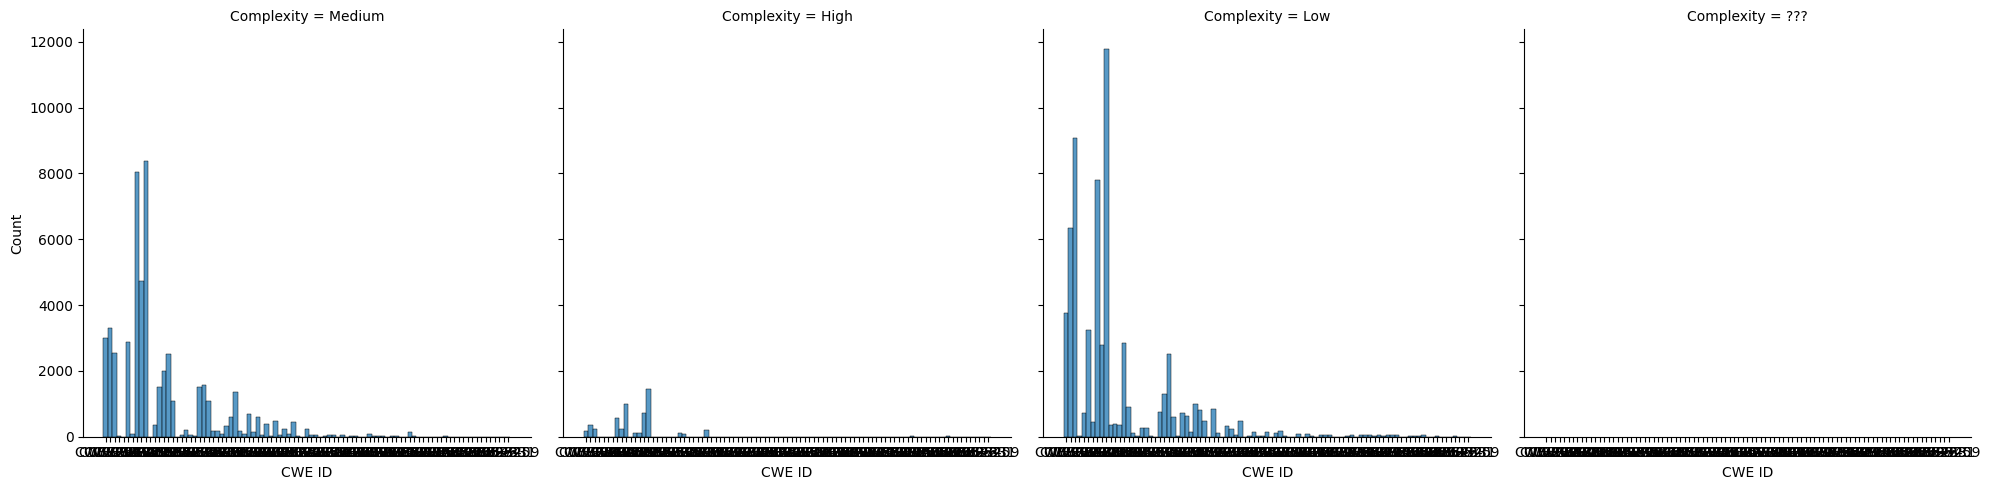

In [71]:
sns.displot(val_data, x="CWE ID", col="Complexity")

In [72]:
s = val_data['CWE ID'].value_counts()

In [80]:
s = val_data['CWE ID'].value_counts().rename_axis('CWE ID').rename('Count') # if x- and y-labels are important


In [81]:
s = s[:20]

In [108]:
sns.set_theme(rc={"figure.figsize":(15, 4)})
sns.set_theme(font_scale=0.5)

<AxesSubplot:xlabel='CWE ID'>

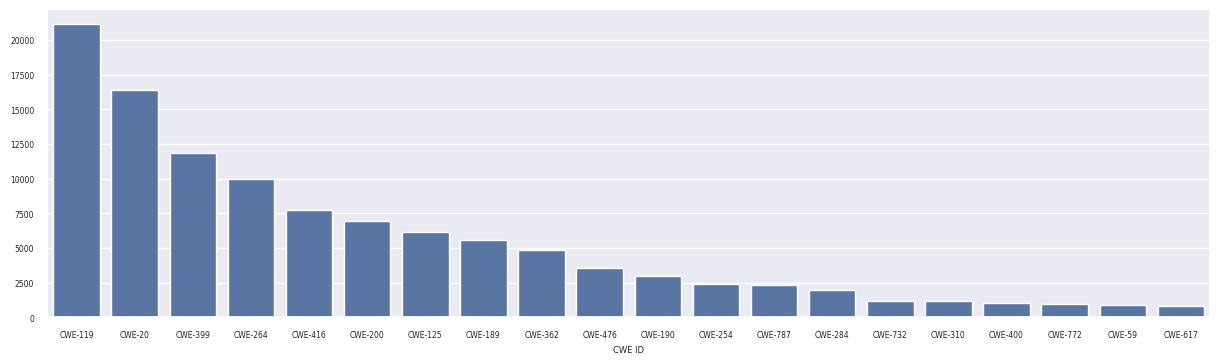

In [109]:
sns.barplot(x=s.index, y=s.values, order=s.index)
